## Importing required packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Generating random data

In [9]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

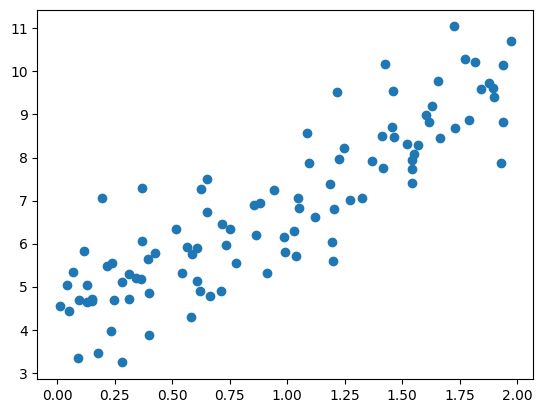

In [10]:
plt.scatter(X, y)
plt.show()

## Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]

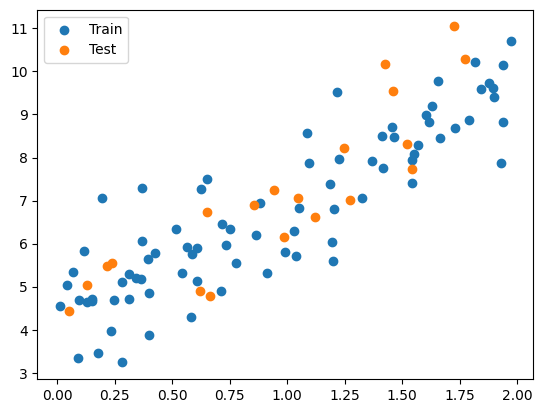

In [12]:
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.legend()
plt.show()

## Add a bias term to the feature matrix

In [17]:
X_train

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [13]:
X_train_bias = np.c_[np.ones((80, 1)), X_train]
X_test_bias = np.c_[np.ones((20, 1)), X_test]

In [16]:
X_train_bias


array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [18]:
# Batch gradient descent function
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    theta = np.random.randn(X.shape[1], 1)  # initialize with random values
    for iteration in range(n_iterations):
        gradients = 2/X.shape[0] * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

In [19]:
# Train the model using batch gradient descent
theta = batch_gradient_descent(X_train_bias, y_train)

In [20]:
# Make predictions on the test set
y_pred = X_test_bias.dot(theta)

In [21]:
# Evaluate the model
mse = np.mean((y_pred - y_test)**2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9683522993097442


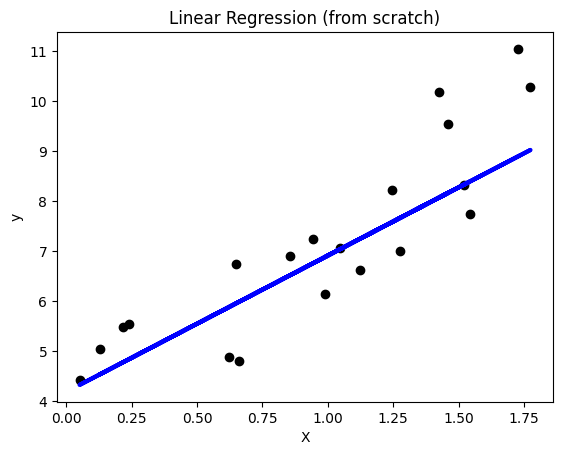

In [22]:
# Visualize the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression (from scratch)')
plt.show()